In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
# os.chdir('data')

# ignore warnings
warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [100]:
df_currencies = pd.read_csv('data/currency_pair_prices.csv')
df_currencies

,Date,EUR/USD,USD/JPY,GBP/USD,USD/CHF,USD/CAD,AUD/USD
0,2018-01-01,1.2010,112.66,1.3503,0.9745,1.2545,0.7805
1,2018-01-02,1.2059,112.30,1.3588,0.9716,1.2513,0.7830
2,2018-01-03,1.2014,112.50,1.3516,0.9771,1.2533,0.7836
3,2018-01-04,1.2068,112.75,1.3553,0.9746,1.2487,0.7864
4,2018-01-05,1.2030,113.08,1.3571,0.9752,1.2409,0.7864
...,...,...,...,...,...,...,...
779,2020-12-25,1.2204,103.48,1.3548,0.8889,1.2869,0.7599
780,2020-12-28,1.2214,103.78,1.3449,0.8884,1.2845,0.7577
781,2020-12-29,1.2247,103.56,1.3500,0.8843,1.2817,NaN
782,2020-12-30,1.2295,103.17,1.3622,0.8810,1.2758,0.7684


In [101]:
df_eur = df_currencies.loc[:,['Date', 'EUR/USD']]
df_eur

,Date,EUR/USD
0,2018-01-01,1.2010
1,2018-01-02,1.2059
2,2018-01-03,1.2014
3,2018-01-04,1.2068
4,2018-01-05,1.2030
...,...,...
779,2020-12-25,1.2204
780,2020-12-28,1.2214
781,2020-12-29,1.2247
782,2020-12-30,1.2295


In [102]:
for x in df_eur.columns:
    print(x, type(df_eur[x]), df_eur[x].dtype)

Date <class 'pandas.core.series.Series'> object
EUR/USD <class 'pandas.core.series.Series'> float64


In [103]:
df_eur['Date'] = pd.to_datetime(df_eur['Date'], format='%Y-%m-%d')
df_eur['Date']

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
779   2020-12-25
780   2020-12-28
781   2020-12-29
782   2020-12-30
783   2020-12-31
Name: Date, Length: 784, dtype: datetime64[ns]

In [104]:
for x in df_eur.columns:
    print(x, type(df_eur[x]), df_eur[x].dtype)

Date <class 'pandas.core.series.Series'> datetime64[ns]
EUR/USD <class 'pandas.core.series.Series'> float64


In [105]:
df_eur.set_index('Date', inplace=True)
df_eur

,EUR/USD
Date,
2018-01-01,1.2010
2018-01-02,1.2059
2018-01-03,1.2014
2018-01-04,1.2068
2018-01-05,1.2030
...,...
2020-12-25,1.2204
2020-12-28,1.2214
2020-12-29,1.2247


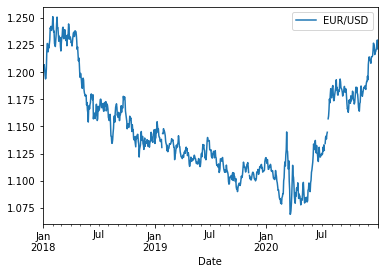

In [108]:
df_eur.plot()
plt.show()

In [109]:
df_eur.ffill(inplace=True)

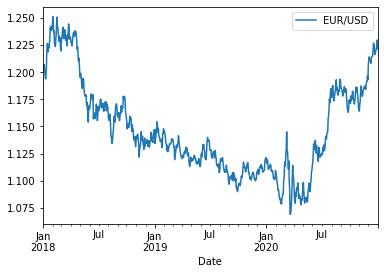

In [111]:
df_eur.plot()
plt.show()

In [112]:
df_eur = df_eur.resample('D').ffill()

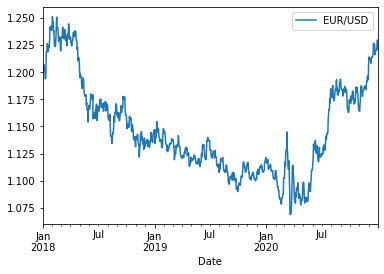

In [114]:
df_eur.plot()
plt.show()

## Stationary transformations

#### First difference

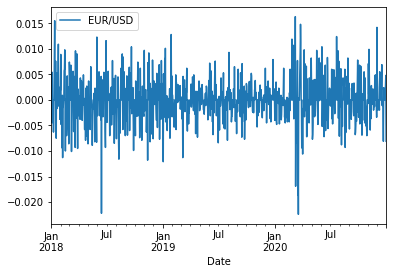

In [118]:
df_eur.diff().plot()
plt.show()

#### Variable Percent Change

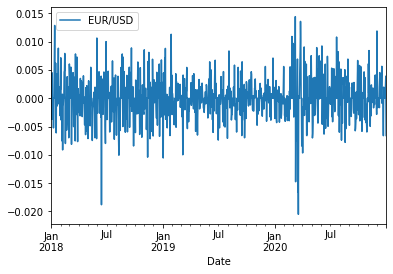

In [120]:
df_eur.pct_change().plot()
plt.show()

#### Log transformation

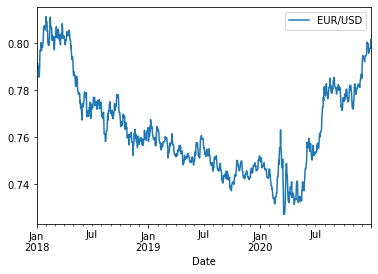

In [121]:
np.log(1 +  df_eur).plot()
plt.show()

## Rolling averages

<AxesSubplot:>

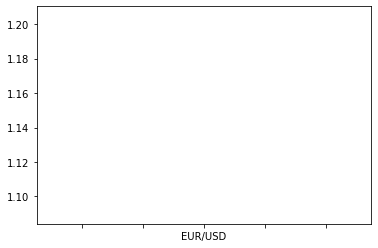

In [129]:
df_eur.mean().dropna().plot()

Rolling Mean
AxesSubplot(0.125,0.125;0.775x0.755)

Rolling St. Dev
EUR/USD    0.042585
dtype: float64

Cumulative Sales
            EUR/USD
Date               
2018-01-01   1.2010
2018-01-02   2.4069
2018-01-03   3.6083
2018-01-04   4.8151
2018-01-05   6.0181


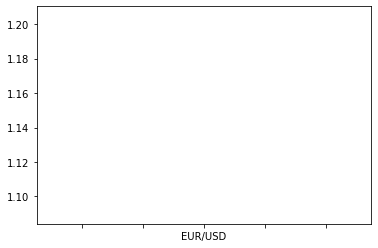

In [128]:
window_size = 7
rolling_window = df_eur.rolling(window_size)

print('Rolling Mean')
print(df_eur.mean().dropna().plot())
print('\nRolling St. Dev')
print(df_eur.std().dropna().head())
print('\nCumulative Sales')
print(df_eur.cumsum().dropna().head())